# Code to create taxa barplots

In [2]:
import numpy as np
import pandas as pd 

from utils import (
    extract_bacterial_col_names,
    rename_and_extract_columns, 
    normalize,
    collapse_low_abundant, 
    taxa_barplot
)

In [3]:
col = "maxillary_ostium_size"
df = pd.read_csv("./data/taxonomy/level-4.csv")

In [4]:
bacs = extract_bacterial_col_names(df)

In [5]:
bacs_short = [x[2][3:] if x[2][3:] else "Other" for x in bacs.str.split(";") ]

In [6]:
bacs_df = rename_and_extract_columns(df, bacs, bacs_short)

In [7]:
norm_df = collapse_low_abundant(bacs_df, rel_abd_threshold=0.01, collapse_column="Other")

In [8]:
meta_df = norm_df.join(df[["host_body_site", "host_subject_id", "maxillary_ostium_size"]])
meta_df["host_subject_id"] = meta_df["host_subject_id"].astype(int)
order = list(norm_df.sum(axis=0).sort_values(ascending=False).index)
order.remove("Other")
order.append("Other")

## Figure 5. The taxonomic composition of the samples from the frontal sinus, middle nasal meatus and maxillary sinus.

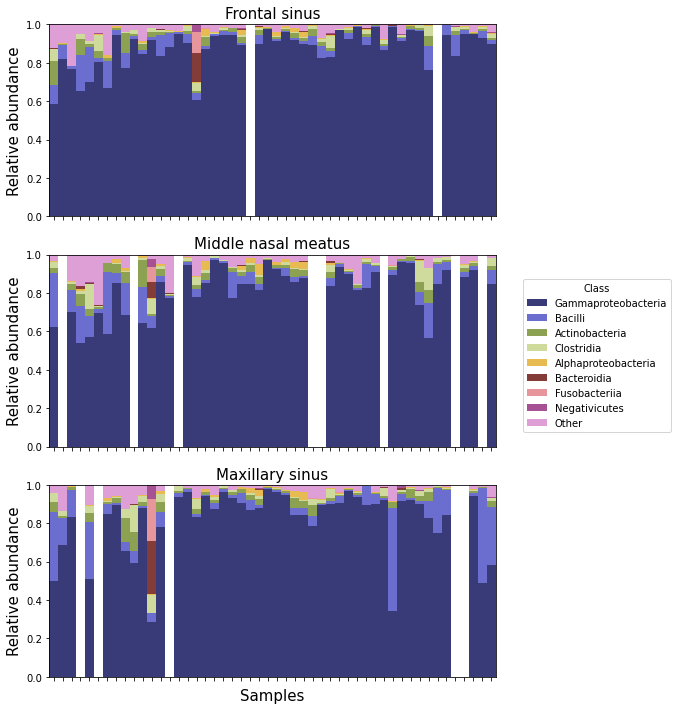

In [9]:
cat_col = "host_body_site"
fig, axes = plt.subplots(3, 1, figsize=(8, 12), sharex=True)
for cat, ax in zip(meta_df[cat_col].unique()[[2, 0, 1]], axes): 
    taxa_barplot(meta_df[meta_df[cat_col] == cat], 
                 order, "host_subject_id", ax, 
                 xlim=(-0.5, 49.5))
    ax.set_title(cat.capitalize(), fontsize=15)
    ax.set_ylabel("Relative abundance", fontsize=15)

axes[1].legend(title="Class", bbox_to_anchor=(1.05, 0.9))    

axes[2].set_xlabel("Samples", fontsize=15);
axes[2].set_xticklabels([]);
fig.savefig("taxa-barplot.png", dpi=600, bbox_inches="tight")

## Figure 6. The taxonomic composition of the samples from the maxillary sinus in the groups with wide, narrow and blocked maxillary ostium.

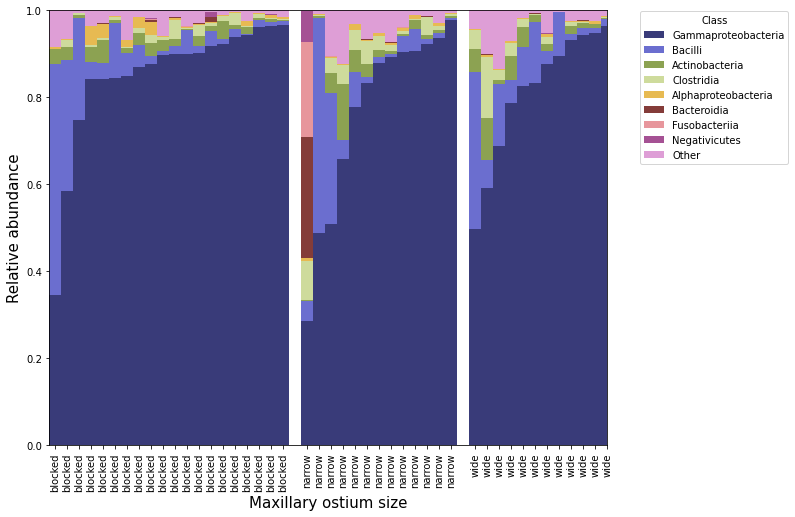

In [83]:
fig, ax = plt.subplots(figsize=(10, 8))
sort_dict = {"narrow":1, "blocked":2, "wide":3}
meta_df["encoded"] = meta_df["maxillary_ostium_size"].replace(sort_dict)
plot_df = meta_df[meta_df["host_body_site"] == "maxillary sinus"].sort_values(by=['encoded', 'Gammaproteobacteria', "Bacilli"])

gr = "maxillary_ostium_size"
empty_line_df = plot_df.groupby(gr).apply(
    lambda d: d.append({gr: d.name}, ignore_index=True).astype({gr: str})
).reset_index(drop=True)
taxa_barplot(empty_line_df, order, "maxillary_ostium_size", ax, xlim=(-0.5, 44.5))
nums = plot_df[gr].value_counts().to_numpy()
tick_pos = list(range(0, nums[0])) + list(range(nums[0]+1, nums[:2].sum() + 1)) + list(range(nums[:2].sum()+2, nums[:3].sum()+2))
ax.set_xticks(tick_pos)
ax.set_xlabel("Maxillary ostium size", fontsize=15)
ax.set_ylabel("Relative abundance", fontsize=15)
ax.legend(bbox_to_anchor=(1.05, 1.01), title="Class")
fig.savefig("taxa-maxillary-ostium.png", dpi=600);